In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
# Reading two csv files and combining them together
def read_data():
    path = r"E:\Metro1\artifacts\\"
    df1=pd.read_csv(path + "outputfile_1.csv")
    df2=pd.read_csv(path + "outputfile_2.csv")
    df3=pd.read_csv(path + "outputfile_3.csv")
    df4=pd.read_csv(path + "outputfile_4.csv")

# df_parking=pd.read_csv('parking.csv')

    df=pd.concat([df1,df2,df3,df4])
    df_park=pd.concat([df2,df3,df4])
    df['VEHICLE']=np.where((df['CARS']==0) & (df['TWO_WHEELER']==0),0,1)
    df_park['VEHICLE']=np.where((df_park['CARS']==0) & (df_park['TWO_WHEELER']==0),0,1)
    return df,df_park
df,df_park=read_data()

In [3]:
def map_distances():
    df["ACCESS_DIS"]=df["ACCESS_DIS"].astype(int)
    df['ACCESS_DIS_BIN']=0


    def map_access_dis(ACCESS_DIS):
        if ACCESS_DIS in [1, 2]:
            return 1
        elif ACCESS_DIS in [3,4,5,6]:
            return 2
        elif ACCESS_DIS in [7,8,9,10,11]:
            return 3

    # Apply the mapping function to create the 'ACCESS_DIS_BIN' column
    df['ACCESS_DIS_BIN'] = df['ACCESS_DIS'].apply(map_access_dis)
    # print(df['ACCESS_DIS_BIN'].value_counts())

    df['EGRESS_DIS_BIN']=0
    df["EGRESS_DIS"]=df["EGRESS_DIS"].astype(int)

    def map_egress_dis(EGRESS_DIS):
        if EGRESS_DIS in [1,2]:
            return 1
        if EGRESS_DIS in [3,4,5,6]:
            return 2
        if EGRESS_DIS in [7,8,9,10,11]:
            return 3
        elif EGRESS_DIS in [0]:
            return 1
    

    # Apply the mapping function to create the 'EGRESS_DIS_BIN' column
    df['EGRESS_DIS_BIN'] = df['EGRESS_DIS'].apply(map_egress_dis)
    # print(df['EGRESS_DIS_BIN'].value_counts())
    

    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df['ACCESS_TIME_B'] = pd.cut(df['ACCESS_TIME'], bins=bins, labels=labels)


    # Define the bin ranges
    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df['EGRESS_TIME_B'] = pd.cut(df['EGRESS_TIME'], bins=bins, labels=labels)




    df_park["ACCESS_DIS"]=df_park["ACCESS_DIS"].astype(int)
    df_park['ACCESS_DIS_BIN']=0


    def map_access_dis(ACCESS_DIS):
        if ACCESS_DIS in [1, 2]:
            return 1
        elif ACCESS_DIS in [3,4,5,6]:
            return 2
        elif ACCESS_DIS in [7,8,9,10,11]:
            return 3

    # Apply the mapping function to create the 'ACCESS_DIS_BIN' column
    df_park['ACCESS_DIS_BIN'] = df_park['ACCESS_DIS'].apply(map_access_dis)
    # print(df_park['ACCESS_DIS_BIN'].value_counts())

    df_park['EGRESS_DIS_BIN']=0
    df_park["EGRESS_DIS"]=df_park["EGRESS_DIS"].astype(int)

    def map_egress_dis(EGRESS_DIS):
        if EGRESS_DIS in [1,2]:
            return 1
        if EGRESS_DIS in [3,4,5,6]:
            return 2
        if EGRESS_DIS in [7,8,9,10,11]:
            return 3
        elif EGRESS_DIS in [0]:
            return 1
    

    # Apply the mapping function to create the 'EGRESS_DIS_BIN' column
    df_park['EGRESS_DIS_BIN'] = df_park['EGRESS_DIS'].apply(map_egress_dis)
    # print(df_park['EGRESS_DIS_BIN'].value_counts())
    

    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df_park['ACCESS_TIME_B'] = pd.cut(df_park['ACCESS_TIME'], bins=bins, labels=labels)


    # Define the bin ranges
    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df_park['EGRESS_TIME_B'] = pd.cut(df_park['EGRESS_TIME'], bins=bins, labels=labels)

    

    df['ACCESS_DISTANCE'].unique()

    distance={'0.5 to 1 km ':0.75, '< 0.5 km ':0.5, '2.5 km to 3 km ':2.75, '1 km to 1.5 km ':1.25,
       '2 km to 2.5 km ':2.25, '> 5 km ':5, '1.5 km to 2 km ':1.75, '3.5 km to 4 km ':3.75,
       '3 km to 3.5 km ':3.25, '4 km to 4.5 km ':4.25, '4.5 km to 5 km ':4.75,'0.5 km to 1 km ':0.75}



# now create a new column using above dictionary and map value of column ACCESS_DISTANCE to it 
    df['AD']=df['ACCESS_DISTANCE'].map(distance)
    df['ED']=df['EGRESS_DISTANCE'].map(distance)

    df_park['AD']=df_park['ACCESS_DISTANCE'].map(distance)
    df_park['ED']=df_park['EGRESS_DISTANCE'].map(distance)



    return df,df_park
df,df_park=map_distances()

In [4]:
def map_age():
    age_mapping = {
    "18-25 yrs": 21.5,
    '> 60 yrs ':65,
    '36-45yrs ':40, 
    '36-45 yrs ':40, 
    '18-25 yrs ':22,
    '26-35 yrs ':30,
    '18-25yrs ':22,
    '26-35yrs ':30, 
    '46-60 yrs ':54,
      '46-60yrs ':54
    }

# Map the 'AGE' column to average values
    df['AGE'] = df['AGE'].map(age_mapping)
    df_park['AGE']=df_park['AGE'].map(age_mapping)

    return df,df_park

df,df_park=map_age()



In [5]:
def map_income():
       income_mapper={'>2 Lakhs':3, 'nan':0, '25,001 – 50,000':1, '1,00,001 – 2,00,000':3,
       '10,001 – 25,000':1, '50,001 – 1,00,000':2, '<=10,000':1}
       df['INCOME']=df.INCOME.map(income_mapper)
       df_park['INCOME']=df_park.INCOME.map(income_mapper)

       # print(df['INCOME'].value_counts())

       return df,df_park
df,df_park=map_income()

In [6]:
df['M_ORIGIN'].dropna()
df=df[df['M_ORIGIN']!='Purple line ']

dict_stations={'Jallalhi': 'Jalahalli (green line)',
             'Mahalakshmi ': 'Mahalakshmi (green line)',
       'Majestic': 'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
       'Banashankari': 'Banashankari (green line)', 
       'Byapanahalli': 'Baiyappanahalli (purple line)', 
       'Vajarahalli': 'Vajarahalli (green line)',
       'Kengeri to byp BYP': 'Kengeri (purple line)',
         'Byp': 'Baiyappanahalli (purple line)', 
         'Byapanahalli ': 'Baiyappanahalli (purple line)', 
         'Nagasandra ': 'Nagasandra (green line)',
       'Jallahalli': 'Jalahalli (green line)', 
       'Kengeri ': 'Kengeri (purple line)', 
       'Jalahalli ': 'Jalahalli (green line)',
         'Jallahlli': 'Jalahalli (green line)', 
         'Jalahalli': 'Jalahalli (green line)',
       'MAJESTIC': 'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
         'Majestic ': 'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
           'KENGERI': 'Kengeri (purple line)',
       'Kranthiveera sangolli rayanna ': 'Kranthiveera Sangolli Rayanna Railway Station (purple line)',
         'National College ': 'National College (green line)',
       'Kranthi Veera sanguli rayanna ': 'Kranthiveera Sangolli Rayanna Railway Station (purple line)',
         'Magadi road': 'Magadi Road (purple line)',
           'Bayappanahalli': 'Baiyappanahalli (purple line)',
       'Yelachinahalli': 'Yelachenahalli (green line)',
         'Silk institute ': 'Silk Institute (green line)',
           'Lalbagh': 'Lalbagh (green line)',
       'Central colleger sir m visvesaraya ': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
       'Sir M. Vishweshwaraya ,central college ': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
       'Central M visvesaraya ': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
         'Centarl': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
       'SirM Vishweshwaraya stn.central college ': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
       'Sandal soap factory': 'Sandal Soap Factory (green line)',
         'Mysuru road': 'Mysore Road (purple line)', 
         'Rajarajeshwari nagar': 'Rajarajeshwari Nagar (purple line)',
       'Kengeri': 'Kengeri (purple line)', 
       'Vishweshwaraya central college ': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
       'Peenya industries ': 'Peenya Industry (green line)',
       'Cubbon park': 'Cubbon Park (purple line)',
         'Indiranagar': 'Indiranagar (purple line)',
           'Indiranagar ': 'Indiranagar (purple line)', 
           'Indranagar ': 'Indiranagar (purple line)',
       'Jnanabharthi ': 'Jnanabharathi (purple line)',
         'Jnanabharathi ': 'Jnanabharathi (purple line)', 
         'Vijaynagar ': 'Vijayanagar (purple line)',
         'Krantivira Sangolli Rayanna Railway Station (purple line)': 'Kranthiveera Sangolli Rayanna Railway Station (purple line)'
         }
# use dict_stations to rename the objects in M_ORIGIN column
df.loc[:, 'M_ORIGIN'] = df['M_ORIGIN'].replace(dict_stations)


df['M_ORIGIN'].nunique()

62

In [7]:
df['M_DESTINATION'].dropna()
df=df.loc[(df['M_DESTINATION']!='Purple line ') & (df['M_DESTINATION']!='Purple line') &(df['M_DESTINATION']!='Green line') 
            &(df['M_DESTINATION']!='K') & (df['M_DESTINATION']!='C')]
dest_dict={
         'Nagasandra to Silk institute ': 'Nagasandra (green line)', 
       'Majestic baiyapanahali': 'Baiyappanahalli (purple line)',
       'Nagasandra-silk institute ': 'Silk Institute (green line)',
       'Majestic baiyapanahali ': 'Baiyappanahalli (purple line)',
         'Baya':'Baiyappanahalli (purple line)',
           'Baiyapanahali majestic ': 'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
       'Mantri square': 'Mantri Square Sampige Road (green line)',
         'Nag silk': 'Silk Institute (green line)', 
         'Nagasandra-Silk board': 'Silk Institute (green line)',
       'South end circle ': 'South End Circle (green line)',
         'Baiyapanahali kengeri ': 'Kengeri (purple line)',
       'Central college to pattanagere': 'Pattanagere (purple line)',
       'Yeswatpur majestic ': 'NadaPrabhu Kempegowda Station, Majestic (green/purple line)',
       'Nagasandra-Silk institute': 'Silk Institute (green line)',
         'Silk institute to Nagasandra ': 'Nagasandra (green line)',
       'Silkinstitute': 'Silk Institute (green line)',
         'Konnankunte cross': 'Konanakunte Cross (green line)',
           'RV road': 'Rashtreeya Vidyalaya Road (green line)',
       'Bayyappan to kengeri':'Kengeri (purple line)',
         'Majestic to byapnahalli':'Baiyappanahalli (purple line)',
           'Majestic':'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
       'Banashankari to gurugunta':'Guruguntepalya (green line)',
         'Majestic to byapnahalli ':'Baiyappanahalli (purple line)',
       'SILK INSTITUTE - NAGASANDRA':'Nagasandra (green line)',
         'Peenya industries ':'Peenya Industry (green line)',
       'Bayyappanahalli to kengeri ':'Kengeri (purple line)',
         'Silk institute-Nagasandra':'Nagasandra (green line)',
       'SILK INSTITUTE-NAGASANDRA':'Nagasandra (green line)', 
       'Kengeri to bayyappanahalli ':'Baiyappanahalli (purple line)',
       'Kengeri to byapnahalli ':'Baiyappanahalli (purple line)',
         'NAGASANDRA-SILK institute':'Silk Institute (green line)',
       'silk institute-Nagasandra ':'Nagasandra (green line)',
         'NAGASANDRA-SILK INSTITUTE':'Silk Institute (green line)',
       'Silk institute-Nagasandra ':'Nagasandra (green line)',
         'Nagasandra - silk institute ':'Silk Institute (green line)',
       'Peenya industry ':'Peenya Industry (green line)', 
       'KENGERI - BAIYYAPANAHALLI':'Baiyappanahalli (purple line)',
       'Majestic kengeri to byp':'Baiyappanahalli (purple line)', 
       'Majestic ':'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
         'KENGERI-BAIYYAPANAHALLI':'Baiyappanahalli (purple line)',
       'BAIYYAPANAHALLI-KENGERI':'Kengeri (purple line)',
         'Bayyappanahalli to kengeri': 'Kengeri (purple line)',
       'Silk institute - nagasandra ':'Nagasandra (green line)',
         'Silkboard':'Silk Institute (green line)', 
         'Banashankari':'Banasankari (green line)',
       'Baiyapanahalli-Kengeri':'Kengeri (purple line)',
         'Srirampura':' Srirampura (green line)',
           'Yashwantpura':'Yeshwanthpur (green line)',
       'Baiyapanahalli-kengeri':'Kengeri (purple line)', 
       'KENGERI-BAIYYAPANAHALLI ':'Baiyappanahalli (purple line)',
       'NAGASANDRA-SILK INSTITUTE ':'Silk Institute (green line)', 
       'Nagasandra-Silk institute ':'Silk Institute (green line)',
       'Yeshwanthapura':'Yeshwanthpur (green line)',
         'Rajajinagar ':'Rajajinagar (green line)',
           'Banashankari ':'Banasankari (green line)',
       'Yelachanahalli-Nagasandra':'Nagasandra (green line)',
         'Dodda kallasndra':'Kallasandra (green line)',
           'Byp to kengeri':'Kengeri (purple line)',
       'Yelachanahalli-nagasandra':'Nagasandra (green line)', 
       'Silk institute to nagasandra ':'Nagasanadra (green line)',
       'Kengeri to bayappanahalli ':'Baiyappanahalli (purple line)',
       'Yelachanahalli-Nagasandra ':'Nagasandra (green line)', 
       'Sandal soap to nagasandra ':'Nagasanadra (green line)',
       'Byapnahalli to kengeri':'Kengeri (purple line)',
         'Byapnahalli to kengeri ':'Kengeri (purple line)',
           'Jalahalli ':'Jalahalli (green line)',
       'Vie':'Vesveshwaraiah (purple line)', 
       'Nagasandra to silk institute ':'Silk Institute (green line)',
         'Lslbagh':'Lalbagh (green line)',
       'Nagasandra yeswatpur ':'Yeswanthpur (green line)',
         'Nagasandra mgroad':'MG Road (purple line)',
           'Nagasandra jpnahar':'Jayaprakash Nagar (green line)',
       'Majestic jayanagar ':'Jayanagar (green line)',
         'Saha to bana':'Banasankari (green line)',
       'Purple line kengeri to byp':'Baiyaappanahalli (purple line)',
         'Chekpet jpnagar':'Jayaprakash Nagar (green line)', 
         'Kengeri to byp':'Baiyappanahalli (purple line)',
       'Purple line kegeri to byappanahalli ':'Baiyappanahalli (purple line)',
         'Byapnahalli to ken':'Kengeri (purple line)',
       'Kengeri Trinity ':'Trinity (purple line)',
       'Swami Vivekananda to kengeriterminal':'Kengeri Bus Terminal (purple line)',
         'Kangeri to hosahalli':'Hosanahalli (purple line)',
       'Kengeri Swami Vivekananda ':'Swami Vivekananda Road (purple line)',
         'Rajarajeswari - cubban park ':'Cubbon Park (purple line)',
       'Byp to kengeri ':'Kengeri (purple line)', 
       'Kengeri-byappanahalli':'Baiyappanahalli (purple line)', 
       'Kengeri -byapanahalli':'Baiyaappanahalli (purple line)',
         'Kengeri-byappanahalli ':'Baiyaappanahalli (purple line)',
       'Silk institute to Peenya industry':'Peenya Industry (green line)', 
       'Kengeri to byappanahalli ':'Baiyaappanahalli (purple line)',
       'Silk institute to Peenya industry ':'Peenya Industry (green line)',
       'Byapanahalli - kengeri ':'Kengeri (purple line)',
         'Byappanahalli to kengeri ':'Kengeri (purple line)',
       'Byapanahalli -kengeri':'Kengeri (purple line)', 
       'Hoodi (purple line)':'Hoody (purple line)',
       'Kundalahalli (purple line)':'Kundalahalli (purple line)',
         'Seetharampalya (purple line)':'Seetharampalya (purple line)',
       'Pattandur Agrahara (purple line)':'Pattandur Agrahara (purple line)',
       'Baiyaappanahalli (purple line)': 'Baiyappanahalli (purple line)',
       'Banasankari (green line)':'Banashankari (green line)',
       'Guruguntepalya (green line)':'Goraguntepalya (green line)',
       'Mahatma Gandhi Road (purple line)':'MG Road (purple line)',
       'NadaPrabhu Kempegowda Station, Majestic (green/purple line)': 'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
       'Nagasanadra (green line)':'Nagasandra (green line)','Yeshwanthpur (green line)':'Yeswanthpur (green line)',
       'Hosanahalli (purple line)':'Sri Balagangadharanatha Swamiji Station, Hosahalli (purple line)',
        'Vesveshwaraiah (purple line)':'Sir.M.Visvesvaraya Stn., Central College (purple line)',
        ' Srirampura (green line)': 'Srirampura (green line)',
        'Baiyaappanahalli (purple line)': 'Baiyappanahalli (purple line)',
        'Banasankari (green line)': 'Banashankari (green line)'

       }

df.loc[:, 'M_DESTINATION'] = df['M_DESTINATION'].replace(dest_dict)



# Filter the objects in columns M_ORIGIN and M_DESTINATION such that anything after '(' is ignored


# Sort objects of column M_DESTINATION alphabatically
df['M_DESTINATION'].sort_values().nunique()

73

In [8]:
df['M_ORIGIN'] = df['M_ORIGIN'].str.split('(').str[0]
df['M_DESTINATION'] = df['M_DESTINATION'].str.split('(').str[0]

In [9]:
import pandas as pd

# Assuming df is your DataFrame with columns 'M_ORIGIN' and 'RENT_BICYCLE'

# Get value counts for 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df_origin = df.groupby(['M_ORIGIN', 'RENT_BICYCLE']).size().unstack(fill_value=0)

# Calculate the count for each 'M_ORIGIN'
counts_df_origin['count'] = counts_df_origin.sum(axis=1)

# Calculate the percentage for values 1 and 3 in 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df_origin['percentage_value_1'] = counts_df_origin[1] / counts_df_origin['count']

# Get the top 10 stations with the highest percentage of options 1 and 3 in 'RENT_BICYCLE'
top_10_stations = counts_df_origin.sort_values(by=['percentage_value_1'], ascending=False).head(10) 

# Print the information for each station
print("Top 10 stations with highest percentages of options 1 in RENT_BICYCLE:")
for station in top_10_stations.index:
    print(f"\nStation: {station}")
    print(f"Number of occurrences: {counts_df_origin.loc[station, 'count']}")
    print(f"Percentage of entries for option 1: {counts_df_origin.loc[station, 'percentage_value_1']:.2%}")



Top 10 stations with highest percentages of options 1 in RENT_BICYCLE:

Station: Swami Vivekananda Road 
Number of occurrences: 17
Percentage of entries for option 1: 35.29%

Station: Kengeri Bus Terminal 
Number of occurrences: 24
Percentage of entries for option 1: 33.33%

Station: Pantharapalya - Nayandahalli 
Number of occurrences: 18
Percentage of entries for option 1: 33.33%

Station: Kadugodi Tree Park 
Number of occurrences: 7
Percentage of entries for option 1: 28.57%

Station: Rashtreeya Vidyalaya Road 
Number of occurrences: 18
Percentage of entries for option 1: 27.78%

Station: Whitefield - Kadugodi 
Number of occurrences: 26
Percentage of entries for option 1: 26.92%

Station: Mysore Road 
Number of occurrences: 36
Percentage of entries for option 1: 25.00%

Station: Doddakallasandra 
Number of occurrences: 21
Percentage of entries for option 1: 23.81%

Station: Vajarahalli 
Number of occurrences: 17
Percentage of entries for option 1: 23.53%

Station: Banashankari 
Numbe

In [10]:

# Get value counts for 'M_ORIGIN'
counts_df_origin = df['M_ORIGIN'].value_counts().reset_index()
counts_df_origin.columns = ['M_ORIGIN', 'count']

# Get the top 10 'M_ORIGIN' with the highest number of occurrences
top_10_origin = counts_df_origin.head(10)

# Print the information for each 'M_ORIGIN'
print("Top 10 'M_ORIGIN' with highest number of occurrences:")
for origin in top_10_origin['M_ORIGIN']:
    occurrences = counts_df_origin[counts_df_origin['M_ORIGIN'] == origin]['count'].values[0]
    percentage_value_1 = df[(df['M_ORIGIN'] == origin) & (df['RENT_BICYCLE'] == 1)].shape[0] / occurrences
    percentage_value_3 = df[(df['M_ORIGIN'] == origin) ].shape[0] / occurrences

    print(f"\nM_ORIGIN: {origin}")
    print(f"Number of occurrences: {occurrences}")
    print(f"Percentage of entries for option 1: {percentage_value_1:.2%}")
   


Top 10 'M_ORIGIN' with highest number of occurrences:

M_ORIGIN: Jalahalli 
Number of occurrences: 230
Percentage of entries for option 1: 10.43%

M_ORIGIN: Nadaprabhu Kempegowda Station, Majestic 
Number of occurrences: 101
Percentage of entries for option 1: 9.90%

M_ORIGIN: Baiyappanahalli 
Number of occurrences: 99
Percentage of entries for option 1: 8.08%

M_ORIGIN: Nagasandra 
Number of occurrences: 70
Percentage of entries for option 1: 11.43%

M_ORIGIN: Kengeri 
Number of occurrences: 64
Percentage of entries for option 1: 10.94%

M_ORIGIN: Silk Institute 
Number of occurrences: 64
Percentage of entries for option 1: 14.06%

M_ORIGIN: Indiranagar 
Number of occurrences: 60
Percentage of entries for option 1: 15.00%

M_ORIGIN: Rajajinagar 
Number of occurrences: 58
Percentage of entries for option 1: 15.52%

M_ORIGIN: Chickpet 
Number of occurrences: 49
Percentage of entries for option 1: 2.04%

M_ORIGIN: Srirampura 
Number of occurrences: 49
Percentage of entries for option 1: 

In [11]:
import pandas as pd

# Assuming df is your DataFrame with columns 'M_ORIGIN' and 'RENT_BICYCLE'

# Get value counts for 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df_origin = df.groupby(['M_ORIGIN', 'RENT_BICYCLE']).size().unstack(fill_value=0)

# Calculate the count for each 'M_ORIGIN'
counts_df_origin['count'] = counts_df_origin.sum(axis=1)

# Calculate the percentage for values 1 and 3 in 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df_origin['percentage_value_1'] = counts_df_origin[1] / counts_df_origin['count']
counts_df_origin['percentage_value_3'] = counts_df_origin[3] / counts_df_origin['count']

# Get the top 10 stations with the highest percentage of options 1 and 3 in 'RENT_BICYCLE'
top_10_stations = counts_df_origin.sort_values(by=['percentage_value_1', 'percentage_value_3'], ascending=False).head(10)

# Print the information for each station
print("Top 10 stations with highest percentages of options 1 and 3 in RENT_BICYCLE:")
for station in top_10_stations.index:
    print(f"\nStation: {station}")
    print(f"Number of occurrences: {counts_df_origin.loc[station, 'count']}")
    print(f"Percentage of entries for option 1: {counts_df_origin.loc[station, 'percentage_value_1']:.2%}")
    print(f"Percentage of entries for option 3: {counts_df_origin.loc[station, 'percentage_value_3']:.2%}")
    cumulative_sum = counts_df_origin.loc[station, 'percentage_value_1'] + counts_df_origin.loc[station, 'percentage_value_3']
    print(f"Cumulative sum of percentage_value_1 and percentage_value_3: {cumulative_sum:.2%}")


Top 10 stations with highest percentages of options 1 and 3 in RENT_BICYCLE:

Station: Swami Vivekananda Road 
Number of occurrences: 17
Percentage of entries for option 1: 35.29%
Percentage of entries for option 3: 17.65%
Cumulative sum of percentage_value_1 and percentage_value_3: 52.94%

Station: Kengeri Bus Terminal 
Number of occurrences: 24
Percentage of entries for option 1: 33.33%
Percentage of entries for option 3: 20.83%
Cumulative sum of percentage_value_1 and percentage_value_3: 54.17%

Station: Pantharapalya - Nayandahalli 
Number of occurrences: 18
Percentage of entries for option 1: 33.33%
Percentage of entries for option 3: 11.11%
Cumulative sum of percentage_value_1 and percentage_value_3: 44.44%

Station: Kadugodi Tree Park 
Number of occurrences: 7
Percentage of entries for option 1: 28.57%
Percentage of entries for option 3: 28.57%
Cumulative sum of percentage_value_1 and percentage_value_3: 57.14%

Station: Rashtreeya Vidyalaya Road 
Number of occurrences: 18
Perce

In [12]:

# Get value counts for 'M_ORIGIN'
counts_df_origin = df['M_ORIGIN'].value_counts().reset_index()
counts_df_origin.columns = ['M_ORIGIN', 'count']

# Get the top 10 'M_ORIGIN' with the highest number of occurrences
top_10_origin = counts_df_origin.head(10)

# Print the information for each 'M_ORIGIN'
print("Top 10 'M_ORIGIN' with highest number of occurrences:")
for origin in top_10_origin['M_ORIGIN']:
    occurrences = counts_df_origin[counts_df_origin['M_ORIGIN'] == origin]['count'].values[0]
    percentage_value_1 = df[(df['M_ORIGIN'] == origin) & (df['RENT_BICYCLE'] == 1)].shape[0] / occurrences
    percentage_value_3 = df[(df['M_ORIGIN'] == origin) & (df['RENT_BICYCLE'] == 3)].shape[0] / occurrences

    print(f"\nM_ORIGIN: {origin}")
    print(f"Number of occurrences: {occurrences}")
    print(f"Percentage of entries for option 1: {percentage_value_1:.2%}")
    print(f"Percentage of entries for option 3: {percentage_value_3:.2%}")


Top 10 'M_ORIGIN' with highest number of occurrences:

M_ORIGIN: Jalahalli 
Number of occurrences: 230
Percentage of entries for option 1: 10.43%
Percentage of entries for option 3: 36.09%

M_ORIGIN: Nadaprabhu Kempegowda Station, Majestic 
Number of occurrences: 101
Percentage of entries for option 1: 9.90%
Percentage of entries for option 3: 20.79%

M_ORIGIN: Baiyappanahalli 
Number of occurrences: 99
Percentage of entries for option 1: 8.08%
Percentage of entries for option 3: 24.24%

M_ORIGIN: Nagasandra 
Number of occurrences: 70
Percentage of entries for option 1: 11.43%
Percentage of entries for option 3: 28.57%

M_ORIGIN: Kengeri 
Number of occurrences: 64
Percentage of entries for option 1: 10.94%
Percentage of entries for option 3: 40.62%

M_ORIGIN: Silk Institute 
Number of occurrences: 64
Percentage of entries for option 1: 14.06%
Percentage of entries for option 3: 26.56%

M_ORIGIN: Indiranagar 
Number of occurrences: 60
Percentage of entries for option 1: 15.00%
Percentag

In [13]:
import pandas as pd

# Assuming df is your DataFrame with columns 'M_ORIGIN' and 'RENT_BICYCLE'

# Get value counts for 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df_origin = df.groupby(['M_DESTINATION', 'RENT_BICYCLE']).size().unstack(fill_value=0)

# Calculate the count for each 'M_ORIGIN'
counts_df_origin['count'] = counts_df_origin.sum(axis=1)

# Calculate the percentage for values 1 and 3 in 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df_origin['percentage_value_2'] = counts_df_origin[2] / counts_df_origin['count']
counts_df_origin['percentage_value_3'] = counts_df_origin[3] / counts_df_origin['count']

# Get the top 10 stations with the highest percentage of options 1 and 3 in 'RENT_BICYCLE'
top_10_stations = counts_df_origin.sort_values(by=['percentage_value_2', 'percentage_value_3'], ascending=False).head(10)

# Print the information for each station
print("Top 10 stations with highest percentages of options 2 and 3 in RENT_BICYCLE:")
for station in top_10_stations.index:
    print(f"\nStation: {station}")
    print(f"Number of occurrences: {counts_df_origin.loc[station, 'count']}")
    print(f"Percentage of entries for option 2: {counts_df_origin.loc[station, 'percentage_value_2']:.2%}")
    print(f"Percentage of entries for option 3: {counts_df_origin.loc[station, 'percentage_value_3']:.2%}")
    cumulative_sum = counts_df_origin.loc[station, 'percentage_value_2'] + counts_df_origin.loc[station, 'percentage_value_3']
    print(f"Cumulative sum of percentage_value_2 and percentage_value_3: {cumulative_sum:.2%}")


Top 10 stations with highest percentages of options 2 and 3 in RENT_BICYCLE:

Station: Seetharampalya 
Number of occurrences: 7
Percentage of entries for option 2: 42.86%
Percentage of entries for option 3: 28.57%
Cumulative sum of percentage_value_2 and percentage_value_3: 71.43%

Station: Singayyanapalya 
Number of occurrences: 3
Percentage of entries for option 2: 33.33%
Percentage of entries for option 3: 0.00%
Cumulative sum of percentage_value_2 and percentage_value_3: 33.33%

Station: Vajarahalli 
Number of occurrences: 16
Percentage of entries for option 2: 31.25%
Percentage of entries for option 3: 12.50%
Cumulative sum of percentage_value_2 and percentage_value_3: 43.75%

Station: Dasarahalli 
Number of occurrences: 28
Percentage of entries for option 2: 28.57%
Percentage of entries for option 3: 28.57%
Cumulative sum of percentage_value_2 and percentage_value_3: 57.14%

Station: Jnanabharathi 
Number of occurrences: 11
Percentage of entries for option 2: 27.27%
Percentage of

In [14]:
import pandas as pd

# Assuming df is your DataFrame with columns 'M_ORIGIN' and 'RENT_BICYCLE'

# Get value counts for 'M_ORIGIN'
counts_df_origin = df['M_DESTINATION'].value_counts().reset_index()
counts_df_origin.columns = ['M_DESTINATION', 'count']

# Get the top 10 'M_ORIGIN' with the highest number of occurrences
top_10_origin = counts_df_origin.head(10)

# Print the information for each 'M_ORIGIN'
print("Top 10 'M_ORIGIN' with highest number of occurrences:")
for origin in top_10_origin['M_DESTINATION']:
    occurrences = counts_df_origin[counts_df_origin['M_DESTINATION'] == origin]['count'].values[0]
    percentage_value_2 = df[(df['M_ORIGIN'] == origin) & (df['RENT_BICYCLE'] == 2)].shape[0] / occurrences
    percentage_value_3 = df[(df['M_ORIGIN'] == origin) & (df['RENT_BICYCLE'] == 3)].shape[0] / occurrences

    print(f"\nM_DESTINATION: {origin}")
    print(f"Number of occurrences: {occurrences}")
    print(f"Percentage of entries for option 2: {percentage_value_2:.2%}")
    print(f"Percentage of entries for option 3: {percentage_value_3:.2%}")


Top 10 'M_ORIGIN' with highest number of occurrences:

M_DESTINATION: Baiyappanahalli 
Number of occurrences: 221
Percentage of entries for option 2: 5.88%
Percentage of entries for option 3: 10.86%

M_DESTINATION: Nagasandra 
Number of occurrences: 137
Percentage of entries for option 2: 2.19%
Percentage of entries for option 3: 14.60%

M_DESTINATION: Nadaprabhu Kempegowda Station, Majestic 
Number of occurrences: 132
Percentage of entries for option 2: 10.61%
Percentage of entries for option 3: 15.91%

M_DESTINATION: MG Road 
Number of occurrences: 96
Percentage of entries for option 2: 0.00%
Percentage of entries for option 3: 0.00%

M_DESTINATION: Kengeri 
Number of occurrences: 79
Percentage of entries for option 2: 10.13%
Percentage of entries for option 3: 32.91%

M_DESTINATION: Jayanagar 
Number of occurrences: 78
Percentage of entries for option 2: 5.13%
Percentage of entries for option 3: 17.95%

M_DESTINATION: Silk Institute 
Number of occurrences: 76
Percentage of entries f

In [15]:
import pandas as pd

# Assuming df is your DataFrame with columns 'M_ORIGIN' and 'RENT_BICYCLE'

# Get value counts for 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df_origin = df.groupby(['M_ORIGIN', 'RENT_BICYCLE']).size().unstack(fill_value=0)

# Calculate the count for each 'M_ORIGIN'
counts_df_origin['count'] = counts_df_origin.sum(axis=1)

# Calculate the percentage for values 1 and 3 in 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df_origin['percentage_value_1'] = counts_df_origin[1] / counts_df_origin['count']
counts_df_origin['percentage_value_3'] = counts_df_origin[3] / counts_df_origin['count']

# Get the top 10 stations with the highest percentage of options 1 and 3 in 'RENT_BICYCLE'
top_10_stations = counts_df_origin.sort_values(by=['percentage_value_1', 'percentage_value_3'], ascending=False).head(10)

# Print the information for each station
print("Top 10 stations with highest percentages of options 1 and 3 in RENT_BICYCLE:")
for station in top_10_stations.index:
    print(f"\nStation: {station}")
    print(f"Number of occurrences: {counts_df_origin.loc[station, 'count']}")
    print(f"Percentage of entries for option 1: {counts_df_origin.loc[station, 'percentage_value_1']:.2%}")
    print(f"Percentage of entries for option 3: {counts_df_origin.loc[station, 'percentage_value_3']:.2%}")
    cumulative_sum = counts_df_origin.loc[station, 'percentage_value_1'] + counts_df_origin.loc[station, 'percentage_value_3']
    print(f"Cumulative sum of percentage_value_1 and percentage_value_3: {cumulative_sum:.2%}")


Top 10 stations with highest percentages of options 1 and 3 in RENT_BICYCLE:

Station: Swami Vivekananda Road 
Number of occurrences: 17
Percentage of entries for option 1: 35.29%
Percentage of entries for option 3: 17.65%
Cumulative sum of percentage_value_1 and percentage_value_3: 52.94%

Station: Kengeri Bus Terminal 
Number of occurrences: 24
Percentage of entries for option 1: 33.33%
Percentage of entries for option 3: 20.83%
Cumulative sum of percentage_value_1 and percentage_value_3: 54.17%

Station: Pantharapalya - Nayandahalli 
Number of occurrences: 18
Percentage of entries for option 1: 33.33%
Percentage of entries for option 3: 11.11%
Cumulative sum of percentage_value_1 and percentage_value_3: 44.44%

Station: Kadugodi Tree Park 
Number of occurrences: 7
Percentage of entries for option 1: 28.57%
Percentage of entries for option 3: 28.57%
Cumulative sum of percentage_value_1 and percentage_value_3: 57.14%

Station: Rashtreeya Vidyalaya Road 
Number of occurrences: 18
Perce

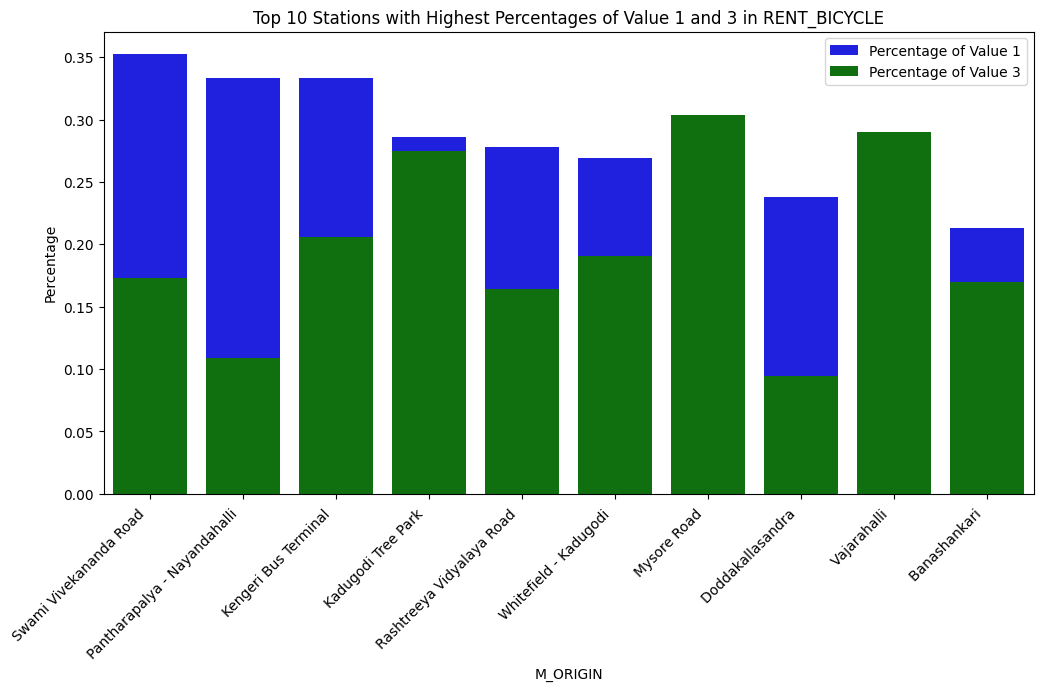

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'M_ORIGIN' and 'RENT_BICYCLE'

# Get value counts for 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df = df.groupby(['M_ORIGIN', 'RENT_BICYCLE']).size().unstack(fill_value=0)

# Calculate the percentage for value 1 and 3 in 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df['percentage_value_1'] = counts_df[1] / counts_df.sum(axis=1)
counts_df['percentage_value_3'] = counts_df[3] / counts_df.sum(axis=1)

# Filter out rows where both options 1 and 3 have zero counts
filtered_counts_df = counts_df[(counts_df[1] > 0) & (counts_df[3] > 0)]

# Sort the DataFrame by the percentage of value 1 in descending order to get the top percentages
sorted_counts_df = filtered_counts_df.sort_values(by='percentage_value_1', ascending=False)

# Select the top 10 stations
top_10_stations = sorted_counts_df.head(10)

# Plot the top 10 stations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stations.index, y='percentage_value_1', data=top_10_stations, label='Percentage of Value 1', color='blue')
sns.barplot(x=top_10_stations.index, y='percentage_value_3', data=top_10_stations, label='Percentage of Value 3', color='green')

# Customize the plot
plt.title("Top 10 Stations with Highest Percentages of Value 1 and 3 in RENT_BICYCLE")
plt.xlabel("M_ORIGIN")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend()

# Show the plot
plt.show()


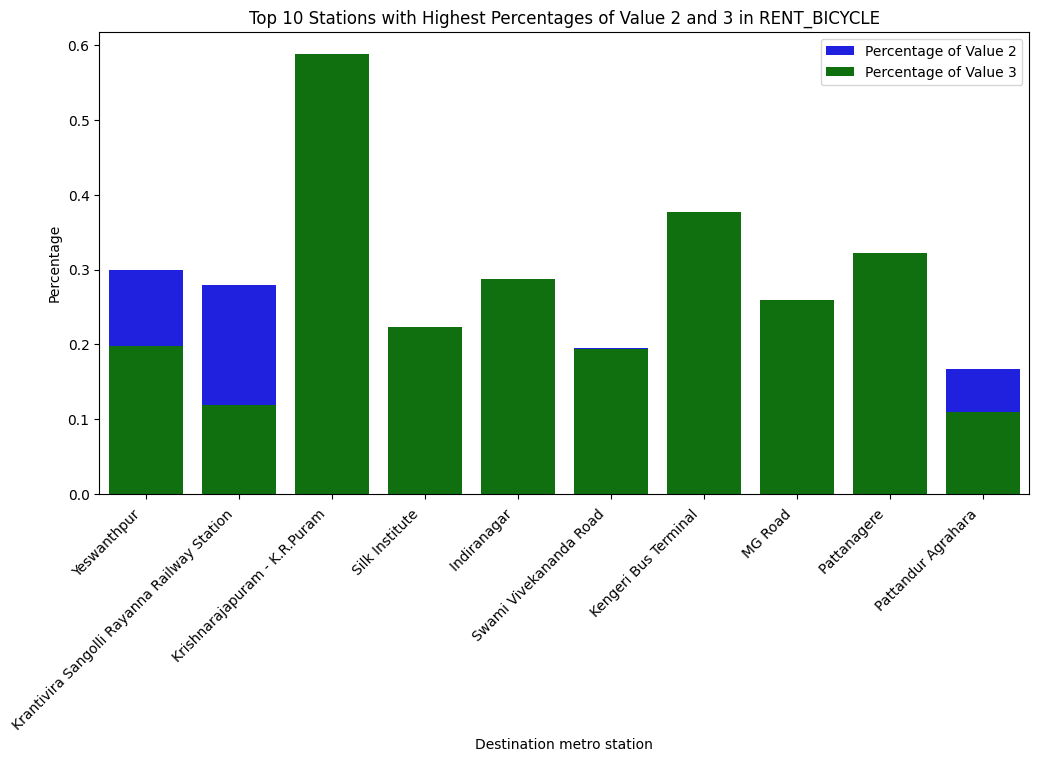

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'M_ORIGIN' and 'RENT_BICYCLE'

# Get value counts for 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df = df.groupby(['M_DESTINATION', 'RENT_BICYCLE']).size().unstack(fill_value=0)

# Calculate the percentage for value 1 and 3 in 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df['percentage_value_2'] = counts_df[1] / counts_df.sum(axis=1)
counts_df['percentage_value_3'] = counts_df[3] / counts_df.sum(axis=1)

# Filter out rows where both options 1 and 3 have zero counts
filtered_counts_df = counts_df[(counts_df[1] > 0) & (counts_df[3] > 0)]

# Sort the DataFrame by the percentage of value 1 in descending order to get the top percentages
sorted_counts_df = filtered_counts_df.sort_values(by='percentage_value_2', ascending=False)

# Select the top 10 stations
top_10_stations = sorted_counts_df.head(10)

# Plot the top 10 stations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stations.index, y='percentage_value_2', data=top_10_stations, label='Percentage of Value 2', color='blue')
sns.barplot(x=top_10_stations.index, y='percentage_value_3', data=top_10_stations, label='Percentage of Value 3', color='green')

# Customize the plot
plt.title("Top 10 Stations with Highest Percentages of Value 2 and 3 in RENT_BICYCLE")
plt.xlabel("Destination metro station")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [18]:
# Lets group the data frame by M_ORIGIN and compute average ACCESS_TIME for each M_ORIGIN type
df_group_one=df[['M_ORIGIN','ACCESS_TIME']]

#lets calculate the average ACCESS_TIME for each M_ORIGIN category.
df_group_one=df_group_one.groupby(['M_ORIGIN'],as_index=False).mean()

# print all values sorted by descending order
np.printoptions(precision=3)
# np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', None)
df_group_one.sort_values(['ACCESS_TIME'], ascending=False)



,M_ORIGIN,ACCESS_TIME
40,Peenya,23.321429
54,Swami Vivekananda Road,17.529412
44,Rashtreeya Vidyalaya Road,17.055556
18,Kadugodi Tree Park,16.428571
37,Pantharapalya - Nayandahalli,14.833333
32,Mysore Road,12.638889
1,Baiyappanahalli,12.393939
34,Nagasandra,12.114286
13,Indiranagar,11.983333
30,Mahatma Gandhi Road,11.894737


In [19]:
# Lets group the data frame by M_ORIGIN and compute average ACCESS_TIME for each M_ORIGIN type
df_group_one=df[['M_DESTINATION','EGRESS_TIME']]

#lets calculate the average ACCESS_TIME for each M_ORIGIN category.
df_group_one=df_group_one.groupby(['M_DESTINATION'],as_index=False).mean()

# print all values sorted by descending order
np.printoptions(precision=3)
# np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', None)
df_group_one.sort_values(['EGRESS_TIME'], ascending=False)



,M_DESTINATION,EGRESS_TIME
71,Yeshwanthpur,22.500000
35,Magadi Road,14.105263
43,Nagasandra,13.167883
72,Yeswanthpur,12.633333
64,Thalaghattapura,12.625000
63,Swami Vivekananda Road,12.512195
70,Yelachenahalli,12.416667
4,Banasankari,12.333333
9,Deepanjali Nagar,12.181818
3,Baiyappanahalli,12.158371


In [20]:
# Lets group the data frame by M_ORIGIN and compute average ACCESS_TIME for each M_ORIGIN type
df_group_one=df[['M_DESTINATION','ED']]

#lets calculate the average ACCESS_TIME for each M_ORIGIN category.
df_group_one=df_group_one.groupby(['M_DESTINATION'],as_index=False).mean()

# print all values sorted by descending order
np.printoptions(precision=3)
# np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', None)
df_group_one.sort_values(['ED'], ascending=False)



,M_DESTINATION,ED
71,Yeshwanthpur,2.875000
49,Peenya,2.281250
22,Jayaprakash Nagar,2.053571
50,Peenya Industry,2.027778
52,Rajarajeshwari Nagar,1.973684
9,Deepanjali Nagar,1.909091
64,Thalaghattapura,1.906250
70,Yelachenahalli,1.854167
39,Mysore Road,1.846154
3,Baiyappanahalli,1.834842


In [21]:
# Lets group the data frame by M_ORIGIN and compute average ACCESS_TIME for each M_ORIGIN type
df_group_one=df[['M_ORIGIN','AD']]

#lets calculate the average ACCESS_TIME for each M_ORIGIN category.
df_group_one=df_group_one.groupby(['M_ORIGIN'],as_index=False).mean()

# print all values sorted by descending order
np.printoptions(precision=3)
# np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', None)
df_group_one.sort_values(['AD'], ascending=False)



,M_ORIGIN,AD
40,Peenya,2.910714
44,Rashtreeya Vidyalaya Road,2.388889
54,Swami Vivekananda Road,2.382353
17,Jnanabharathi,2.037234
32,Mysore Road,2.013889
34,Nagasandra,1.950000
16,Jayaprakash Nagar,1.862069
5,Dasarahalli,1.815217
15,Jayanagar,1.798913
1,Baiyappanahalli,1.755051


In [22]:
# Lets group the data frame by M_ORIGIN and compute average ACCESS_TIME for each M_ORIGIN type
df_group_one=df[['M_ORIGIN','AD']]

#lets calculate the average and variance of ACCESS_TIME for each M_ORIGIN category.
# df_group_one=df_group_one.groupby(['M_ORIGIN'],as_index=False).mean()
df_group_one=df_group_one.groupby(['M_ORIGIN'],as_index=False).var()

# print all values sorted by descending order
np.printoptions(precision=3)
# np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', None)
df_group_one.sort_values(['AD'], ascending=False)



,M_ORIGIN,AD
40,Peenya,3.538029
32,Mysore Road,3.274802
54,Swami Vivekananda Road,3.266544
1,Baiyappanahalli,2.900484
15,Jayanagar,2.607277
45,Sandal Soap Factory,2.564840
34,Nagasandra,2.553623
44,Rashtreeya Vidyalaya Road,2.538399
5,Dasarahalli,2.528986
14,Jalahalli,2.502835


<AxesSubplot: xlabel='EGRESS_DIS_B', ylabel='Percent'>

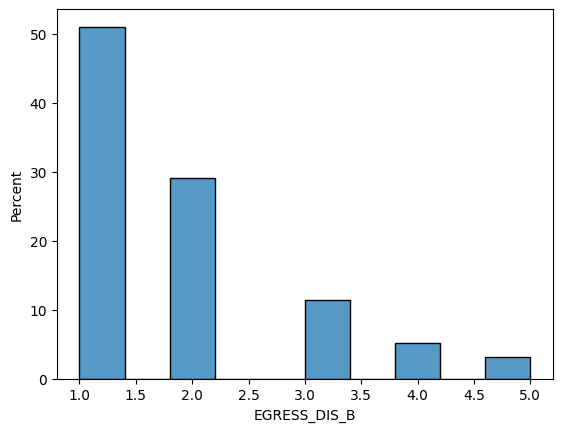

In [23]:
# Lets plot EGRESS_DIS_BIN for M_DESTINATION 'MG Road '
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

# Lets make a new dataframe where only rows correspponding to M_DESTINATION 'MG Road ' are in the new dataframe
df2=df[df['M_DESTINATION']=='MG Road ']
sns.histplot(data=df2,x='EGRESS_DIS_B',stat='percent')

In [24]:
df2=df_park[df_park['PARK']!=3]

# Assuming df is your DataFrame with columns 'M_ORIGIN' and 'RENT_BICYCLE'

# Get value counts for 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df_origin = df2.groupby(['M_ORIGIN', 'PARK']).size().unstack(fill_value=0)

# Calculate the count for each 'M_ORIGIN'
counts_df_origin['count'] = counts_df_origin.sum(axis=1)

# Calculate the percentage for values 1 and 3 in 'RENT_BICYCLE' for each 'M_ORIGIN'
counts_df_origin['percentage_value_1'] = counts_df_origin[1] / counts_df_origin['count']
counts_df_origin['percentage_value_2'] = counts_df_origin[2] / counts_df_origin['count']

# Get the top 10 stations with the highest percentage of options 1 and 3 in 'RENT_BICYCLE'
top_10_stations = counts_df_origin.sort_values(by=['percentage_value_1', 'percentage_value_2'], ascending=False).head(10)

# Print the information for each station
print("Top 10 stations with highest percentages of options 1 and 2 in PARK:")
for station in top_10_stations.index:
    print(f"\nStation: {station}")
    print(f"Number of occurrences: {counts_df_origin.loc[station, 'count']}")
    print(f"Percentage of entries for option 1: {counts_df_origin.loc[station, 'percentage_value_1']:.2%}")
    print(f"Percentage of entries for option 2: {counts_df_origin.loc[station, 'percentage_value_2']:.2%}")
    cumulative_sum = counts_df_origin.loc[station, 'percentage_value_1'] + counts_df_origin.loc[station, 'percentage_value_2']
    print(f"Cumulative sum of percentage_value_1 and percentage_value_2: {cumulative_sum:.2%}")


Top 10 stations with highest percentages of options 1 and 2 in PARK:

Station: Kadugodi Tree Park (purple line)
Number of occurrences: 7
Percentage of entries for option 1: 71.43%
Percentage of entries for option 2: 28.57%
Cumulative sum of percentage_value_1 and percentage_value_2: 100.00%

Station: Sri Sathya Sai Hospital (purple line)
Number of occurrences: 4
Percentage of entries for option 1: 50.00%
Percentage of entries for option 2: 25.00%
Cumulative sum of percentage_value_1 and percentage_value_2: 75.00%

Station: Nallurhalli (purple line)
Number of occurrences: 4
Percentage of entries for option 1: 50.00%
Percentage of entries for option 2: 0.00%
Cumulative sum of percentage_value_1 and percentage_value_2: 50.00%

Station: Vijayanagar (purple line)
Number of occurrences: 30
Percentage of entries for option 1: 43.33%
Percentage of entries for option 2: 6.67%
Cumulative sum of percentage_value_1 and percentage_value_2: 50.00%

Station: Magadi Road (purple line)
Number of occurr

In [25]:
df2=df_park[df_park['PARK']!=3]
# Get value counts for 'M_ORIGIN'
counts_df_origin = df2['M_ORIGIN'].value_counts().reset_index()
counts_df_origin.columns = ['M_ORIGIN', 'count']

# Get the top 10 'M_ORIGIN' with the highest number of occurrences
top_10_origin = counts_df_origin.head(20)

# Print the information for each 'M_ORIGIN'
print("Top 10 'M_ORIGIN' with highest number of occurrences:")
for origin in top_10_origin['M_ORIGIN']:
    occurrences = counts_df_origin[counts_df_origin['M_ORIGIN'] == origin]['count'].values[0]
    percentage_value_1 = df2[(df2['M_ORIGIN'] == origin) & (df2['PARK'] == 1)].shape[0] / occurrences
    percentage_value_2 = df2[(df2['M_ORIGIN'] == origin) & (df2['PARK'] == 2)].shape[0] / occurrences

    print(f"\nM_ORIGIN: {origin}")
    print(f"Number of occurrences: {occurrences}")
    print(f"Percentage of entries for option 1: {percentage_value_1:.2%}")
    print(f"Percentage of entries for option 2: {percentage_value_2:.2%}")


Top 10 'M_ORIGIN' with highest number of occurrences:

M_ORIGIN: Baiyappanahalli (purple line)
Number of occurrences: 56
Percentage of entries for option 1: 14.29%
Percentage of entries for option 2: 8.93%

M_ORIGIN: Srirampura (green line)
Number of occurrences: 47
Percentage of entries for option 1: 6.38%
Percentage of entries for option 2: 29.79%

M_ORIGIN: Chickpet (green line)
Number of occurrences: 45
Percentage of entries for option 1: 6.67%
Percentage of entries for option 2: 8.89%

M_ORIGIN: Nadaprabhu Kempegowda Station, Majestic (green/purple line)
Number of occurrences: 43
Percentage of entries for option 1: 20.93%
Percentage of entries for option 2: 11.63%

M_ORIGIN: Rajajinagar (green line)
Number of occurrences: 41
Percentage of entries for option 1: 4.88%
Percentage of entries for option 2: 29.27%

M_ORIGIN: Attiguppe (purple line)
Number of occurrences: 40
Percentage of entries for option 1: 25.00%
Percentage of entries for option 2: 7.50%

M_ORIGIN: Indiranagar (purpl